# Slope Prediction for Feed-Forward Process Control (without time)
TODO: Add an explaination of what is in this notebook

## Set up
import neccessary packages and set current directory to lib. This will help with importing the data files

In [1]:
import pandas as pd
import numpy as np
import os
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

home_dir = os.getcwd().split('/notebooks')[0]
sys.path.append(home_dir)
home_dir

'/scratch/garrettroell/machine_learning_clostridium'

## Get Starting Data
This data was generated from the data processing notebook

In [2]:
smooth_data = pd.read_csv(f'{home_dir}/processed_data/smooth_data.csv')
smooth_data.set_index(['composition','trial','time'], drop=True, inplace=True)

Check that imports worked correctly

In [3]:
print(f'Shape of the smooth data: {smooth_data.shape[0]} rows by {smooth_data.shape[1]} columns')

Shape of the smooth data: 856 rows by 24 columns


## Create train/validation/test data sets
Train and validation data comes from compostions 1-7.<br>
test data comes from compostions 8, 9, and 10.

In [4]:
train_validation_data = smooth_data.loc[[1,2,3,4,5,6,7]]
print(f'Shape of the train_validation data: {train_validation_data.shape[0]} rows by {train_validation_data.shape[1]} columns')
test_data = smooth_data.loc[[8,9,10]]
print(f'Shape of the test data: {test_data.shape[0]} rows by {test_data.shape[1]} columns')

Shape of the train_validation data: 550 rows by 24 columns
Shape of the test data: 306 rows by 24 columns


In [5]:
train_validation_data.head()

CO    CO2     H2    acetate   biomass   butanol  \
composition trial time                                                     
1           1     0.2   0.5  0.375  0.125  19.831073  0.410803  0.028316   
                  0.3   0.5  0.375  0.125  22.196249  0.403602  0.031357   
                  0.4   0.5  0.375  0.125  25.293925  0.403709  0.028700   
                  0.5   0.5  0.375  0.125  29.005157  0.406214  0.031038   
                  0.6   0.5  0.375  0.125  32.899333  0.410848  0.043533   

                        butyrate    ethanol  flow rate  acetate_Δ  ...  \
composition trial time                                             ...   
1           1     0.2   0.051013  15.144135       20.0  18.298778  ...   
                  0.3   0.050367  14.522308       20.0  23.651756  ...   
                  0.4   0.035514  13.956015       20.0  30.976760  ...   
                  0.5   0.041123  13.322048       20.0  37.112317  ...   
                  0.6   0.081221  12.648214       20.0  38.941765  ...   

                        prev_acetate  prev_biomass  prev_butanol  \
composition trial time                                             
1           1     0.2      18.001195      0.421076      0.028260   
                  0.3      19.831073      0.410803      0.028316   
                  0.4      22.196249      0.403602      0.031357   
                  0.5      25.293925      0.403709      0.028700   
                  0.6      29.005157      0.406214      0.031038   

                        prev_butyrate  prev_ethanol  prev_acetate_Δ  \
composition trial time                                                
1           1     0.2        0.061033      0.028260       10.961665   
                  0.3        0.051013      0.028316       18.298778   
                  0.4        0.050367      0.031357       23.651756   
                  0.5        0.035514      0.028700       30.976760   
                  0.6        0.041123      0.031038       37.112317   

                        prev_biomass_Δ  prev_butanol_Δ  prev_butyrate_Δ  \
composition trial time                                                    
1           1     0.2        -0.084697       -0.015584        -0.144950   
                  0.3        -0.102733        0.000561        -0.100208   
                  0.4        -0.072009        0.030416        -0.006462   
                  0.5         0.001068       -0.026579        -0.148525   
                  0.6         0.025050        0.023385         0.056090   

                        prev_ethanol_Δ  
composition trial time                  
1           1     0.2        -0.144950  
                  0.3        -0.100208  
                  0.4        -0.006462  
                  0.5        -0.148525  
                  0.6         0.056090  

[5 rows x 24 columns]

## Define a function that generates the X array and y array for ML model training

The parameter 'input_data' is used to specify whether raw data or the polynomial smoothed data will be used to train the model <br>
The parameter 'conditions_to_include' is a list of the conditions to include in the returned arrays

In [6]:
def get_X_y_arrays(data):

    data_copy = data.copy()
    data_copy.reset_index(inplace=True)
    X = data_copy [['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol', 'CO', 'CO2', 'H2', 'flow rate']]
    y = data_copy [['acetate_Δ', 'biomass_Δ', 'butanol_Δ', 'butyrate_Δ', 'ethanol_Δ']]
 
    return np.array(X), np.array(y)

Apply to train/validation data and test data set

In [7]:
X_train_validation, y_train_validation = get_X_y_arrays(train_validation_data)
X_test, y_test = get_X_y_arrays(test_data)

print(f'Shape of the train_validation X array: {X_train_validation.shape[0]} rows by {X_train_validation.shape[1]} columns')
print(f'Shape of the train_validation y array: {y_train_validation.shape[0]} rows by {y_train_validation.shape[1]} columns')
print(f'Shape of the test X array: {X_test.shape[0]} rows by {X_test.shape[1]} columns')
print(f'Shape of the test y array: {y_test.shape[0]} rows by {y_test.shape[1]} columns')

Shape of the train_validation X array: 550 rows by 9 columns
Shape of the train_validation y array: 550 rows by 5 columns
Shape of the test X array: 306 rows by 9 columns
Shape of the test y array: 306 rows by 5 columns


## Perform train_validation_split on train/validation data

In [8]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25, random_state=42)
print(f'Shape of the train X array: {X_train.shape[0]} rows by {X_train.shape[1]} columns')
print(f'Shape of the train y array: {y_train.shape[0]} rows by {y_train.shape[1]} columns')
print(f'Shape of the validation  X array: {X_validation.shape[0] } rows by {X_validation.shape[1] } columns')
print(f'Shape of the validation  y array: {y_validation.shape[0] } rows by {y_validation.shape[1] } columns')

Shape of the train X array: 412 rows by 9 columns
Shape of the train y array: 412 rows by 5 columns
Shape of the validation  X array: 138 rows by 9 columns
Shape of the validation  y array: 138 rows by 5 columns


Save y_train and y_validation as dataframes. These will be used for prediction evaluation

In [9]:
train_data = pd.DataFrame(data=y_train, columns=['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol'])
validation_data = pd.DataFrame(data=y_validation, columns=['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol'])
print(f'Shape of the train data: {train_data.shape[0]} rows by {train_data.shape[1]} columns')
print(f'Shape of the validation  data: {validation_data.shape[0] } rows by {validation_data.shape[1] } columns')

Shape of the train data: 412 rows by 5 columns
Shape of the validation  data: 138 rows by 5 columns


## Train 25 different models using 5 algorithms for each of the 5 outputs
algorithms = gradient boosting, random forest, support vector, neural net, lasso <br>
outputs = acetate, biomass, butanol, butyrate, ethanol

In [10]:
from machine_learning.model_selector import model_selector

trained_models = {}
for regressor in ['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']:
    print(regressor)
    model = model_selector(regressor)
    trained_models[regressor] = model.fit(X_train, y_train)

gradient boosting
random forest
support vector
neural net
lasso
gaussian process


## Get model predictions for train, validation, and test data sets
Define a function that takes in an X array and outputs a dictionary of prediction dataframes

In [11]:
def get_model_predictions(X_array):
    prediction_dfs = {}
    for regressor in ['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']:
        model = trained_models[regressor]
        prediction_array = model.predict(X_array)
        prediction_dfs[regressor] = pd.DataFrame(data=prediction_array, columns=['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol'])
    return prediction_dfs

Apply function to get prediction dataframe 

In [12]:
train_predictions = get_model_predictions(X_train)
validation_predictions = get_model_predictions(X_validation)
test_predictions = get_model_predictions(X_test)

display(train_predictions['gradient boosting'].head())
display(validation_predictions['lasso'].head())
display(test_predictions['random forest'].head())
display(test_predictions['gaussian process'].head())
display(train_predictions['gaussian process'].head())

,acetate,biomass,butanol,butyrate,ethanol
0,-3.196066,-0.005923,3.409829,2.370211,22.851006
1,8.574366,0.064768,0.832051,1.785179,7.946086
2,-3.724431,-0.039200,3.173906,-0.746280,15.843240
3,-4.301968,-0.008115,2.096595,2.317744,15.769685
4,-13.300120,-0.000871,3.796247,1.860869,14.368049


,acetate,biomass,butanol,butyrate,ethanol
0,-24.449268,0.028429,7.148782,1.147267,17.590575
1,6.631028,0.034242,3.092938,0.556491,5.068360
2,7.118182,0.012757,1.569363,3.066397,1.722691
3,0.689251,0.004089,8.445347,-6.077286,9.170263
4,-3.164665,0.026643,2.924391,1.846068,5.442544


,acetate,biomass,butanol,butyrate,ethanol
0,34.405991,-0.004254,0.285973,-0.068005,-0.515142
1,36.055179,0.012236,0.281361,-0.073513,-0.395316
2,37.098623,0.053344,0.285479,0.006062,-0.418250
3,35.680858,0.070286,0.317834,0.284028,-0.511324
4,35.631750,0.074254,0.507818,0.335837,0.231259


,acetate,biomass,butanol,butyrate,ethanol
0,4.682946,0.023455,2.457331,1.245291,7.781154
1,4.682946,0.023455,2.457331,1.245291,7.781154
2,4.682946,0.023455,2.457331,1.245291,7.781154
3,4.682946,0.023455,2.457331,1.245291,7.781154
4,4.682946,0.023455,2.457331,1.245291,7.781154


,acetate,biomass,butanol,butyrate,ethanol
0,-3.683585,-0.004780,3.725916,2.521533,24.220900
1,8.952818,0.060976,0.714472,1.651236,7.539269
2,-3.801024,-0.036619,3.137152,-0.778781,15.590798
3,-5.860673,-0.013799,2.088909,2.312695,15.307733
4,-12.696404,0.000779,3.761290,1.789981,14.039052


## Evaluate Model Fits
Define functions to evaluated r squared and normalized root mean squared error

In [13]:
from scipy.stats import linregress
from sklearn import metrics

def get_pearson_r2 (measured_list, predicted_list):
    # slope, intercept, r_value, p_value, std_err
    _, _, r_value, _, _ = linregress(measured_list, predicted_list)
    r2 = (r_value**2)
    return r2

def get_norm_rmse (measured_list, predicted_list):
    mse = metrics.mean_squared_error(measured_list, predicted_list)
    rmse = (mse**0.5)
    return rmse/(max(measured_list)-min(measured_list))

In [14]:
# Test cell that can be deleted later
meas = [3,-4,-5,6]
pred = [4,5,6,7]
get_norm_rmse (meas, pred)

0.6492207662311682

Define a function to evaluate the r squared value for each model and data set for a given output (acetate, biomass, ...)

In [70]:
def evaluate_models(output, metric):
    data = {}
    for dataset in ['Train', 'validation', 'test']:
        data[dataset] = []
        for model in ['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']:
            
            if dataset == 'Train':
                prediction_values = train_predictions[model][output]
                measured_values = train_data[output]
            elif dataset == 'validation':
                prediction_values = validation_predictions[model][output]
                measured_values = validation_data[output]
            elif dataset == 'test':
                prediction_values = test_predictions[model][output]
                measured_values = test_data[output]
            else:
                print('Something went wrong')
                
            if metric == 'r2':
                data[dataset].append(get_pearson_r2(measured_values, prediction_values))
            elif metric == 'norm_rmse':
                data[dataset].append(get_norm_rmse(measured_values, prediction_values))
            else:
                print('Something went wrong')
                
    data_table = pd.DataFrame.from_dict(data)
    data_table[f'{output} {metric}'] = ['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']
    data_table.set_index(f'{output} {metric}', inplace=True, drop=True)
        
    return data_table

## Plot evaluation metrics
Plot r$^2$ values first

Apply function to all outputs and metrics (Not needed, but the details are there if 

In [80]:
plt.rcParams.update({'font.size': 11.5})
def plot_evaluation_metrics(output, metric):
    labels = ['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']
    train_data = list(evaluate_models(output, metric)['Train'])
    validation_data = list(evaluate_models(output, metric)['validation'])
    test_data = list(evaluate_models(output, metric)['test'])

    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,5))
    rects1 = ax.bar(x - width, train_data,      width, label='Train')
    rects2 = ax.bar(x,         validation_data,       width, label='validation')
    rects3 = ax.bar(x + width, test_data, width, label='test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} values for {output} slope predictions')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.yscale('log')
#     ax.legend()


    fig.tight_layout()
    plt.savefig(f'{home_dir}/figures/slope_figures_without_time/{metric}_{output}_slope_bar_graph_without_time.png', dpi=100)
    plt.show()

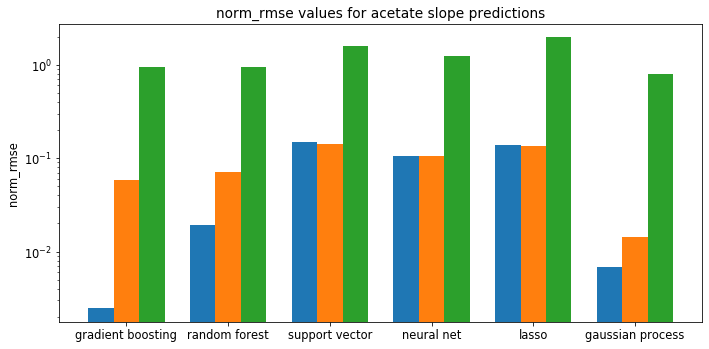

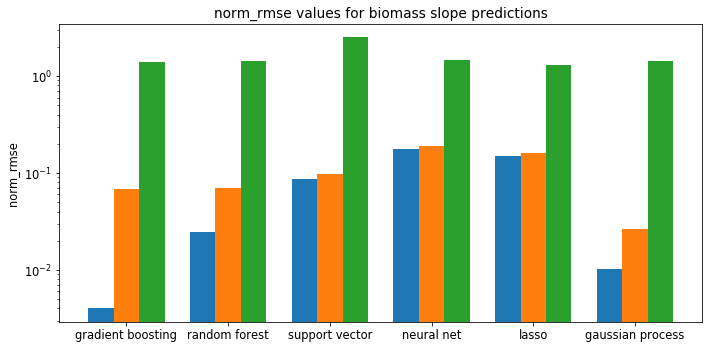

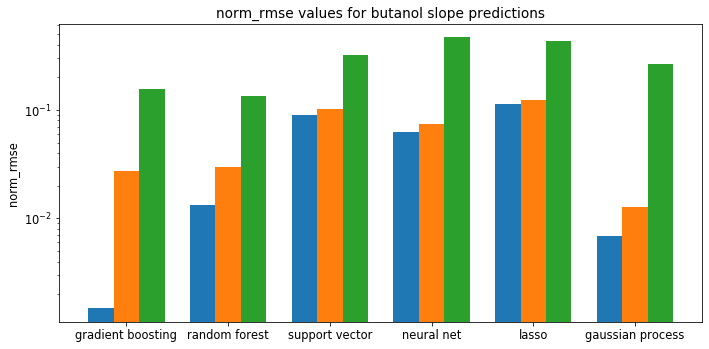

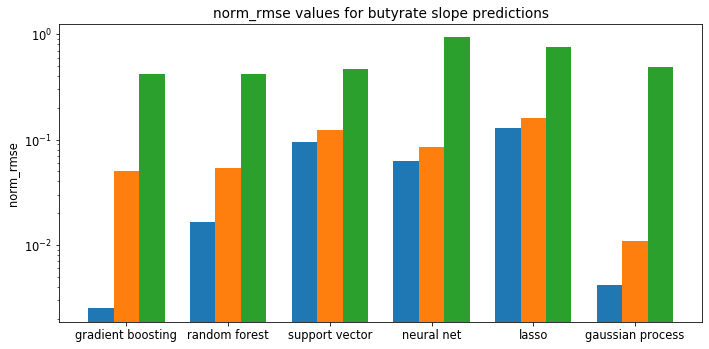

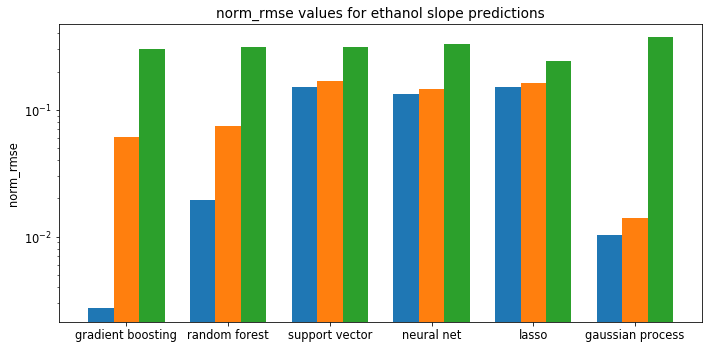

In [81]:
for output in ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol', ]:
    plot_evaluation_metrics(output, 'norm_rmse')

Plot normalized mean squared error

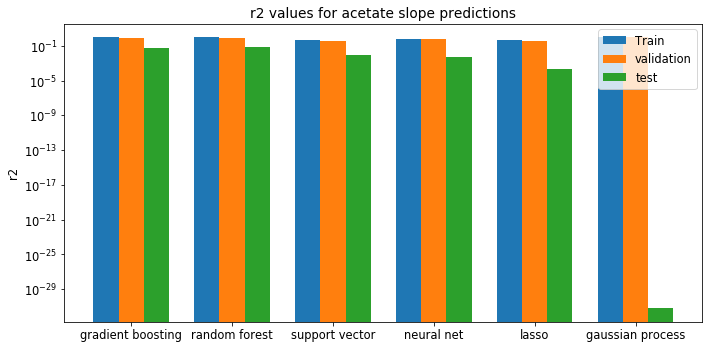

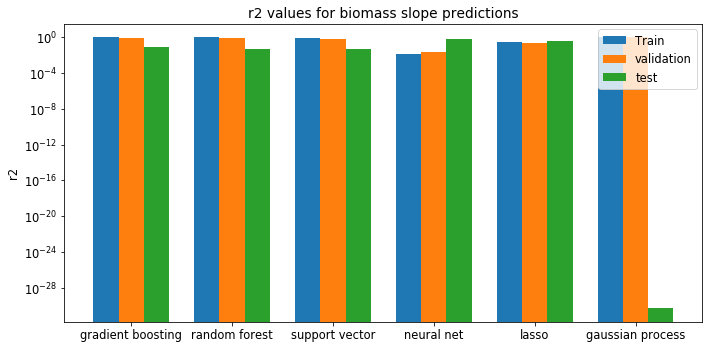

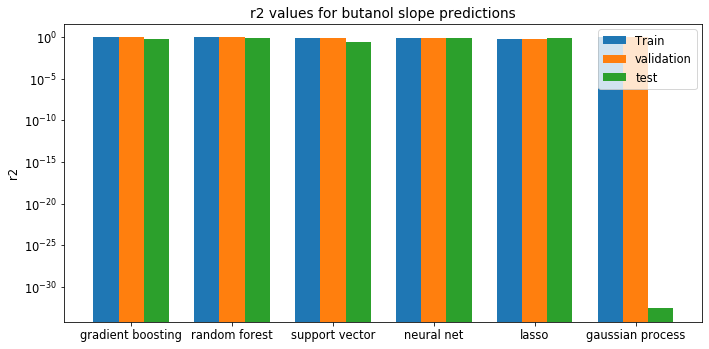

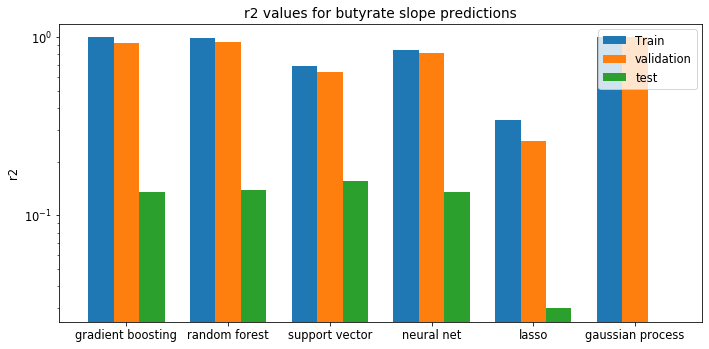

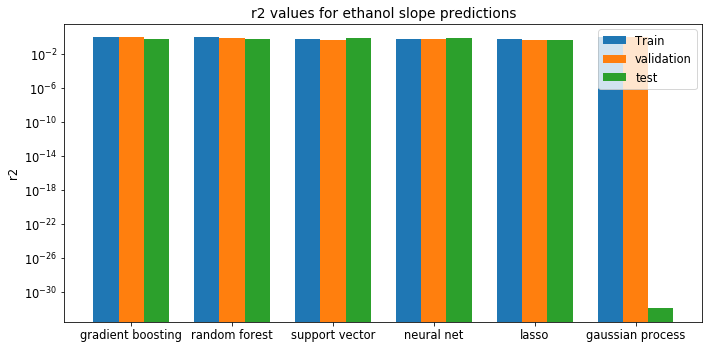

In [77]:
for output in ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol']:
    plot_evaluation_metrics(output, 'r2')

## Plot scatterplots of slope fits
Plot alcohols

In [19]:
# temporary cell

output = 'ethanol'
model = 'gaussian process'

test_data[output]
test_predictions[model][output]

0      7.781154
1      7.781154
2      7.781154
3      7.781154
4      7.781154
         ...   
301    7.781154
302    7.781154
303    7.781154
304    7.781154
305    7.781154
Name: ethanol, Length: 306, dtype: float64

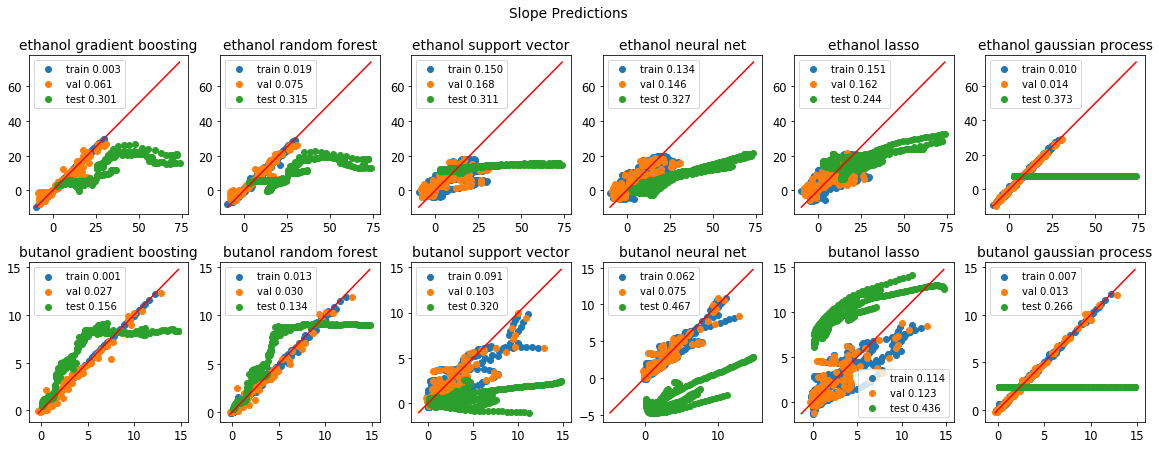

In [74]:
fig, ax = plt.subplots(2, 6, figsize=(20, 6.75))
plt.subplots_adjust(hspace=.3)
fig.suptitle(f'Slope Predictions')

for x, output in enumerate(['ethanol', 'butanol']):
    for y, model in enumerate(['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']):
        ax[x, y].title.set_text(f'{output} {model}')
        
        
        
        ax[x, y].scatter(train_data[output], train_predictions[model][output], label=f'train {get_norm_rmse(train_data[output], train_predictions[model][output]):.3f}')
        ax[x, y].scatter(validation_data[output], validation_predictions[model][output], label=f'val {get_norm_rmse(validation_data[output], validation_predictions[model][output]):.3f}')
        ax[x, y].scatter(test_data[output], test_predictions[model][output], label=f'test {get_norm_rmse(test_data[output], test_predictions[model][output]):.3f}')
        
        minimum = min(pd.concat([
            test_data[output],
            validation_data[output],
            train_data[output], 
            test_predictions[model][output],
            validation_predictions[model][output],
            train_predictions[model][output]
        ], axis=0))

        maximum = max(pd.concat([
            test_data[output],
            validation_data[output],
            train_data[output],
            test_predictions[model][output],
            validation_predictions[model][output],
            train_predictions[model][output]
        ], axis=0))
        
        
        ax[x, y].legend(prop={'size': 10})
        ax[x, y].plot([minimum, maximum], [minimum, maximum], 'r') #row=0, col=0

plt.savefig(f'{home_dir}/figures/slope_figures_without_time/slope_scatterplots_without_time.png', dpi=100)
plt.show()

Plot others

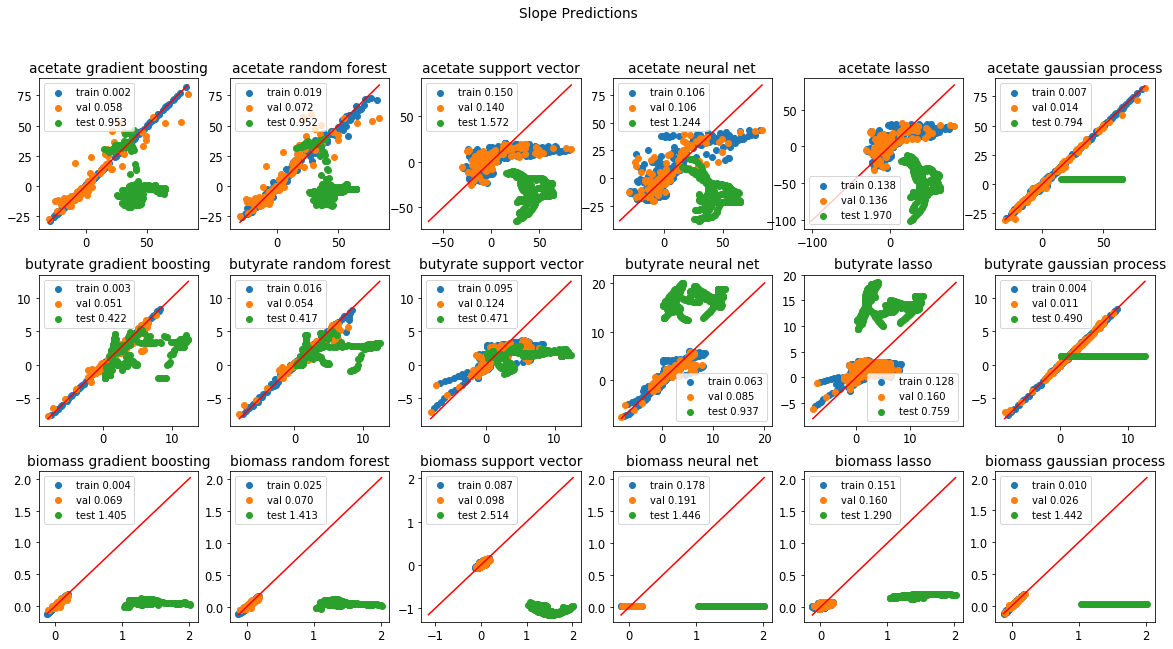

In [57]:

fig, ax = plt.subplots(3, 6, figsize=(20, 10))
plt.subplots_adjust(hspace=.3)
fig.suptitle(f'Slope Predictions')

for x, output in enumerate(['acetate', 'butyrate', 'biomass']):
    for y, model in enumerate(['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']):
        ax[x, y].title.set_text(f'{output} {model}')
        
        
        
        ax[x, y].scatter(train_data[output], train_predictions[model][output], label=f'train {get_norm_rmse(train_data[output], train_predictions[model][output]):.3f}')
        ax[x, y].scatter(validation_data[output], validation_predictions[model][output], label=f'val {get_norm_rmse(validation_data[output], validation_predictions[model][output]):.3f}')
        ax[x, y].scatter(test_data[output], test_predictions[model][output], label=f'test {get_norm_rmse(test_data[output], test_predictions[model][output]):.3f}')
        
        minimum = min(pd.concat([
            test_data[output],
            validation_data[output],
            train_data[output], 
            test_predictions[model][output],
            validation_predictions[model][output],
            train_predictions[model][output]
        ], axis=0))

        maximum = max(pd.concat([
            test_data[output],
            validation_data[output],
            train_data[output],
            test_predictions[model][output],
            validation_predictions[model][output],
            train_predictions[model][output]
        ], axis=0))
        
        
        ax[x, y].legend(prop={'size': 10})
        ax[x, y].plot([minimum, maximum], [minimum, maximum], 'r') #row=0, col=0

# plt.savefig(f'{home_dir}/figures/slope_figures_with_time/slope_scatterplots_without_time.png', dpi=100)
plt.show()

## Feature Importance
Define a function to get feature importances

In [58]:
def get_feature_importances(model):
    outputs = ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol']
    features = ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol', 'CO', 'CO2', 'H2', 'flow rate']

    array_list = []

    for i in range(5):
        feature_importance_array = model.estimators_[i].steps[1][1].best_estimator_.feature_importances_
        array_list.append(list(feature_importance_array))
    df = pd.DataFrame(array_list, columns = features, index = outputs)  
    return df

Get feature importance values

In [59]:
model_list = [
    trained_models['gradient boosting'],
    trained_models['random forest'],
    ]

for model in model_list:
    display(get_feature_importances(model))

,acetate,biomass,butanol,butyrate,ethanol,CO,CO2,H2,flow rate
acetate,0.064074,0.146789,0.626353,0.049499,0.096157,0.001136,0.011583,0.004337,0.000072
biomass,0.365705,0.110029,0.096731,0.236854,0.145663,0.011570,0.024246,0.004158,0.005044
butanol,0.045935,0.054844,0.698393,0.027642,0.026478,0.005151,0.006888,0.134478,0.000191
butyrate,0.241396,0.169619,0.133740,0.120054,0.302456,0.000340,0.008524,0.023656,0.000213
ethanol,0.076470,0.229846,0.101306,0.032718,0.538323,0.002403,0.013202,0.005597,0.000134


,acetate,biomass,butanol,butyrate,ethanol,CO,CO2,H2,flow rate
acetate,0.068791,0.131101,0.635578,0.070956,0.070190,0.003550,0.006409,0.005151,0.008273
biomass,0.354025,0.115532,0.138760,0.220705,0.131443,0.012359,0.012085,0.014327,0.000764
butanol,0.051527,0.057718,0.697139,0.022113,0.029564,0.002246,0.003180,0.134696,0.001817
butyrate,0.144105,0.142717,0.236054,0.085449,0.335966,0.002183,0.008102,0.044927,0.000497
ethanol,0.065091,0.209282,0.101558,0.041734,0.557620,0.003663,0.012550,0.008136,0.000366


Define a function to plot feature importance

In [60]:
def plot_feature_importance_metabolites(model_name):
    model = trained_models[model_name]
    data = get_feature_importances(model)
    
    ethanol_data = data.iloc[4]
    butanol_data = data.iloc[2]
    
    ethanol_data = ethanol_data[:5]
    butanol_data = butanol_data[:5]
    
    labels = ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol'] #, 'CO', 'CO2', 'H2', 'flow rate']
    
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(8,5))
    rects5 = ax.bar(x - 0.5*width, ethanol_data , width, label='Ethanol Rate')
    rects3 = ax.bar(x + 0.5*width , butanol_data , width, label='Butanol Rate')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f'Importance')
    ax.set_yscale('log')
    ax.set_title(f'Feature Importance for {model_name} Slope Predictions (without time)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.savefig(f'{home_dir}/figures/slope_figures_without_time/slope_feature_importance_{model_name}_metabolites_without_time.png', dpi=100)
    plt.show()

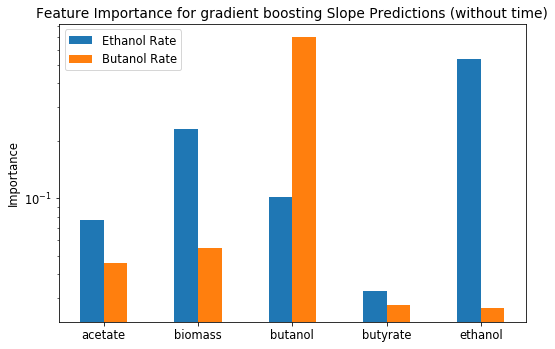

In [61]:
plot_feature_importance_metabolites('gradient boosting')

Plot feature importance gradient boosting and random forest

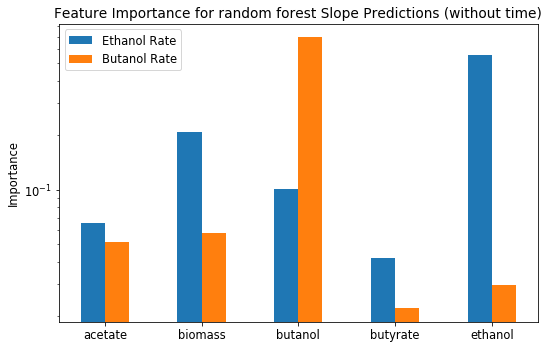

In [62]:
plot_feature_importance_metabolites('random forest')

In [63]:
def plot_feature_importance_gases(model_name):
    model = trained_models[model_name]
    data = get_feature_importances(model)
    
    ethanol_data = data.iloc[4]
    butanol_data = data.iloc[2]
    
    ethanol_data = ethanol_data[5:]
    butanol_data = butanol_data[5:]
    
    labels = ['CO', 'CO2', 'H2', 'flow rate']
    
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(8,5))
    rects5 = ax.bar(x - 0.5*width, ethanol_data , width, label='Ethanol Rate')
    rects3 = ax.bar(x + 0.5*width , butanol_data , width, label='Butanol Rate')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f'Importance')
    ax.set_yscale('log')
    ax.set_title(f'Feature Importance for {model_name} Slope Predictions (without time)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    fig.tight_layout()
    plt.savefig(f'{home_dir}/figures/slope_figures_without_time/slope_feature_importance_gases_{model_name}.png', dpi=100)
    plt.show()

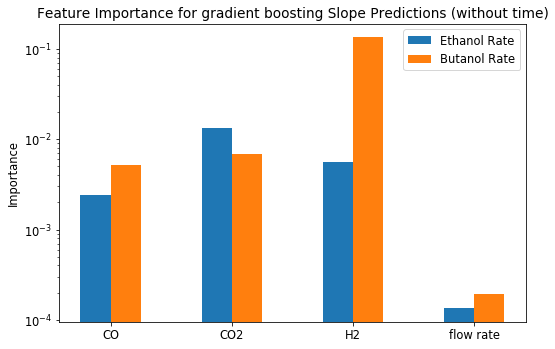

In [64]:
plot_feature_importance_gases('gradient boosting')

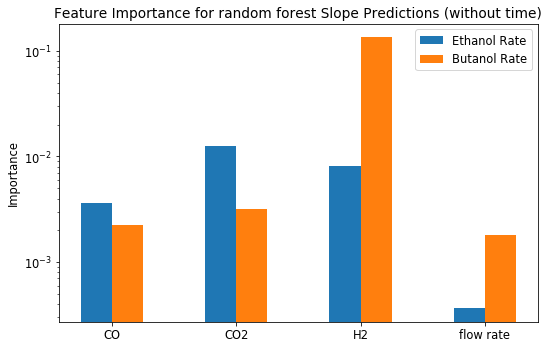

In [65]:
plot_feature_importance_gases('random forest')

### Plot how the most important feature impacts prediction
Goal: show how the concentration of ethanol affects the rate of ethanol production

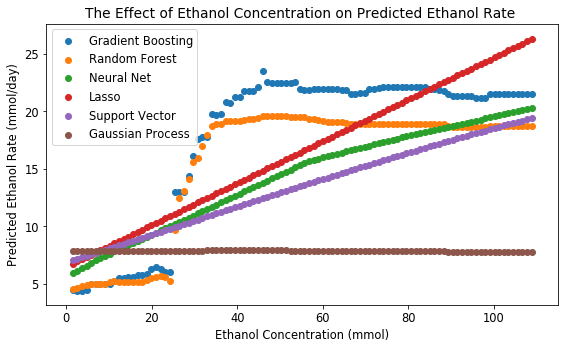

In [66]:
# get range of ethanol values to search
min_ethanol = min(list(smooth_data['ethanol']))
max_ethanol = max(list(smooth_data['ethanol']))

ave_acetate = sum(smooth_data['acetate'])/len(smooth_data['acetate'])
ave_biomass = sum(smooth_data['biomass'])/len(smooth_data['biomass'])
ave_butanol = sum(smooth_data['butanol'])/len(smooth_data['butanol'])
ave_butyrate = sum(smooth_data['butyrate'])/len(smooth_data['butyrate'])
ave_ethanol = sum(smooth_data['ethanol'])/len(smooth_data['ethanol'])

ave_CO = sum(smooth_data['CO'])/len(smooth_data['CO'])
ave_CO2 = sum(smooth_data['CO2'])/len(smooth_data['CO2'])
ave_H2 = sum(smooth_data['H2'])/len(smooth_data['H2'])
ave_flow_rate = sum(smooth_data['flow rate'])/len(smooth_data['flow rate'])

ethanol_range = np.linspace(min_ethanol, max_ethanol, 100)
ethanol_slopes = []
gb_ethanol_slopes = []
rf_ethanol_slopes = []
nn_ethanol_slopes = []
la_ethanol_slopes = []
sv_ethanol_slopes = []
gp_ethanol_slopes = []


for ethanol_value in ethanol_range:
    ml_input = np.array([
        np.array([
        ave_acetate,
        ave_biomass,
        ave_butanol,
        ave_butyrate,
        ethanol_value,
        ave_CO,
        ave_CO2,
        ave_H2,
        ave_flow_rate
        ])
    ])

    prediction_dict = get_model_predictions(ml_input)
    for k in prediction_dict:
        if k == 'gradient boosting':
            ethanol_slope = prediction_dict[k]['ethanol'].values[0]
            gb_ethanol_slopes.append(ethanol_slope)
        if k == 'random forest':
            ethanol_slope = prediction_dict[k]['ethanol'].values[0]
            rf_ethanol_slopes.append(ethanol_slope)
        if k == 'neural net':
            ethanol_slope = prediction_dict[k]['ethanol'].values[0]
            nn_ethanol_slopes.append(ethanol_slope)
        if k == 'lasso':
            ethanol_slope = prediction_dict[k]['ethanol'].values[0]
            la_ethanol_slopes.append(ethanol_slope)
        if k == 'support vector':
            ethanol_slope = prediction_dict[k]['ethanol'].values[0]
            sv_ethanol_slopes.append(ethanol_slope)
        if k == 'gaussian process':
            ethanol_slope = prediction_dict[k]['ethanol'].values[0]
            gp_ethanol_slopes.append(ethanol_slope)
        
fig, ax = plt.subplots(figsize=(8,5))
gb_line = ax.scatter(ethanol_range, gb_ethanol_slopes, label='Gradient Boosting' )
rf_line = ax.scatter(ethanol_range, rf_ethanol_slopes, label='Random Forest' )
nn_line = ax.scatter(ethanol_range, nn_ethanol_slopes, label='Neural Net' )
la_line = ax.scatter(ethanol_range, la_ethanol_slopes, label='Lasso' )
sv_line = ax.scatter(ethanol_range, sv_ethanol_slopes, label='Support Vector' )
gp_line = ax.scatter(ethanol_range, gp_ethanol_slopes, label='Gaussian Process' )
ax.set_xlabel('Ethanol Concentration (mmol)')
ax.set_ylabel('Predicted Ethanol Rate (mmol/day)')
ax.set_title('The Effect of Ethanol Concentration on Predicted Ethanol Rate ')
ax.legend()
fig.tight_layout()
# plt.savefig(f'{home_dir}/figures/slope_figures_without_time/slope_feature_importance_gases_{model_name}.png', dpi=100)
plt.show()
            


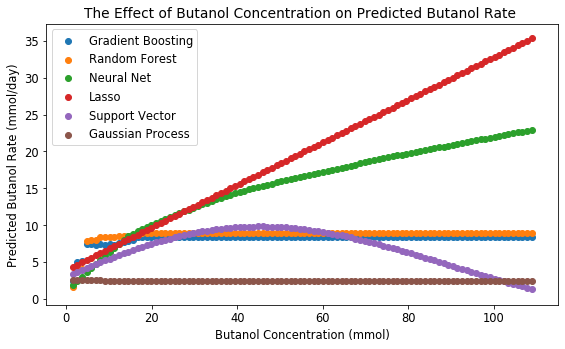

In [67]:
# get range of ethanol values to search
min_butanol = min(list(smooth_data['butanol']))
max_butanol = max(list(smooth_data['butanol']))

ave_acetate = sum(smooth_data['acetate'])/len(smooth_data['acetate'])
ave_biomass = sum(smooth_data['biomass'])/len(smooth_data['biomass'])
ave_butanol = sum(smooth_data['butanol'])/len(smooth_data['butanol'])
ave_butyrate = sum(smooth_data['butyrate'])/len(smooth_data['butyrate'])
ave_ethanol = sum(smooth_data['ethanol'])/len(smooth_data['ethanol'])

ave_CO = sum(smooth_data['CO'])/len(smooth_data['CO'])
ave_CO2 = sum(smooth_data['CO2'])/len(smooth_data['CO2'])
ave_H2 = sum(smooth_data['H2'])/len(smooth_data['H2'])
ave_flow_rate = sum(smooth_data['flow rate'])/len(smooth_data['flow rate'])

butanol_range = np.linspace(min_ethanol, max_ethanol, 100)
butanol_slopes = []
gb_butanol_slopes = []
rf_butanol_slopes = []
nn_butanol_slopes = []
la_butanol_slopes = []
sv_butanol_slopes = []
gp_butanol_slopes = []


for butanol_value in butanol_range:
    ml_input = np.array([
        np.array([
        ave_acetate,
        ave_biomass,
        butanol_value,
        ave_butyrate,
        ave_ethanol,
        ave_CO,
        ave_CO2,
        ave_H2,
        ave_flow_rate
        ])
    ])

    prediction_dict = get_model_predictions(ml_input)
    for k in prediction_dict:
        if k == 'gradient boosting':
            butanol_slope = prediction_dict[k]['butanol'].values[0]
            gb_butanol_slopes.append(butanol_slope)
        if k == 'random forest':
            butanol_slope = prediction_dict[k]['butanol'].values[0]
            rf_butanol_slopes.append(butanol_slope)
        if k == 'neural net':
            butanol_slope = prediction_dict[k]['butanol'].values[0]
            nn_butanol_slopes.append(butanol_slope)
        if k == 'lasso':
            butanol_slope = prediction_dict[k]['butanol'].values[0]
            la_butanol_slopes.append(butanol_slope)
        if k == 'support vector':
            butanol_slope = prediction_dict[k]['butanol'].values[0]
            sv_butanol_slopes.append(butanol_slope)
        if k == 'gaussian process':
            butanol_slope = prediction_dict[k]['butanol'].values[0]
            gp_butanol_slopes.append(butanol_slope)
        
fig, ax = plt.subplots(figsize=(8,5))
gb_line = ax.scatter(butanol_range, gb_butanol_slopes, label='Gradient Boosting' )
rf_line = ax.scatter(butanol_range, rf_butanol_slopes, label='Random Forest' )
nn_line = ax.scatter(butanol_range, nn_butanol_slopes, label='Neural Net' )
la_line = ax.scatter(butanol_range, la_butanol_slopes, label='Lasso' )
sv_line = ax.scatter(butanol_range, sv_butanol_slopes, label='Support Vector' )
gp_line = ax.scatter(butanol_range, gp_butanol_slopes, label='Gaussian Process' )
ax.set_xlabel('Butanol Concentration (mmol)')
ax.set_ylabel('Predicted Butanol Rate (mmol/day)')
ax.set_title('The Effect of Butanol Concentration on Predicted Butanol Rate ')
ax.legend()
fig.tight_layout()
# plt.savefig(f'{home_dir}/figures/slope_figures_without_time/slope_feature_importance_gases_{model_name}.png', dpi=100)
plt.show()
            
